In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

Apply various clustering algorithms

    Agglomerative clustering using complete linkage
    Agglomerative clustering using single linkage
    DBSCAN
    Use elbow method to determine the best k for Kmeans


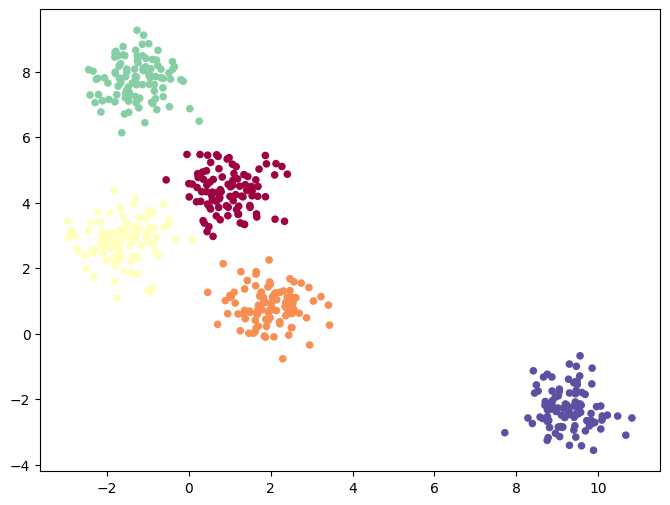

In [4]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])
plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20)    


plt.show()

In [5]:
from sklearn.cluster import AgglomerativeClustering

In [6]:
model_1 = AgglomerativeClustering(n_clusters=5, linkage='complete')
predicted_1 = model_1.fit_predict(X)

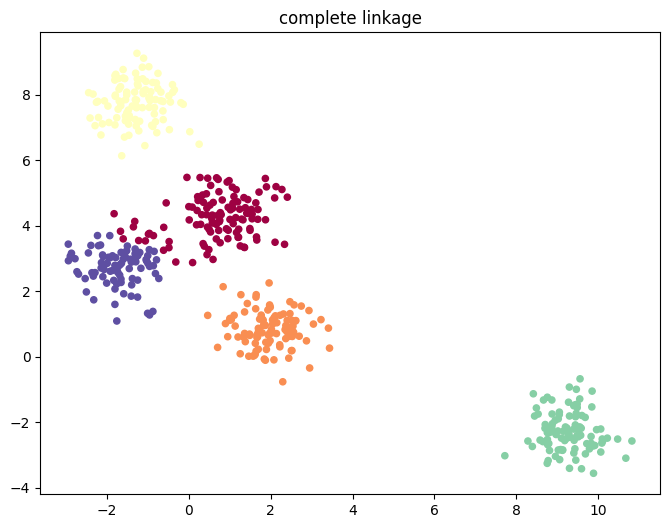

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=predicted_1, cmap='Spectral', s=20)
plt.title("complete linkage")
plt.show()

In [8]:
model_2 = AgglomerativeClustering(n_clusters=5, linkage='single')
predicted_2 = model_2.fit_predict(X)

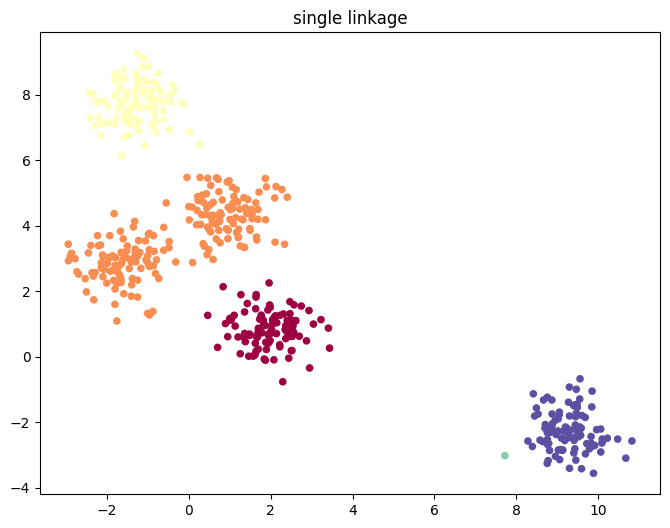

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=predicted_2, cmap='Spectral', s=20)
plt.title("single linkage")
plt.show()

In [10]:
from sklearn.cluster import DBSCAN

In [42]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
predicted_3 = dbscan.fit_predict(X)

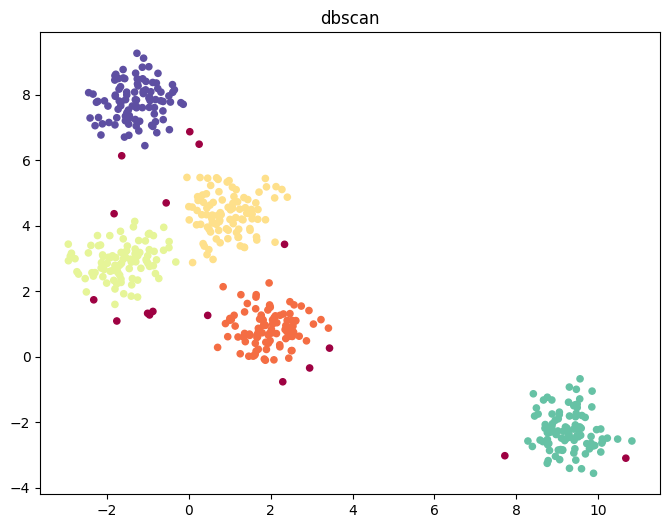

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=predicted_3, cmap='Spectral', s=20)
plt.title("dbscan")
plt.show()

In [14]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [34]:
values_of_k = range(1,11)
k = []

for i in values_of_k:
    kmeans = KMeans(n_clusters=i,random_state=2025)
    kmeans.fit(X)
    k.append(kmeans.inertia_)

In [35]:
knee_locator = KneeLocator(values_of_k, k, curve="convex", direction="decreasing")
optimal_k = knee_locator.knee

In [36]:
kmeans = KMeans(n_clusters=optimal_k, random_state=2025)
predicted_4 = kmeans.fit_predict(X)

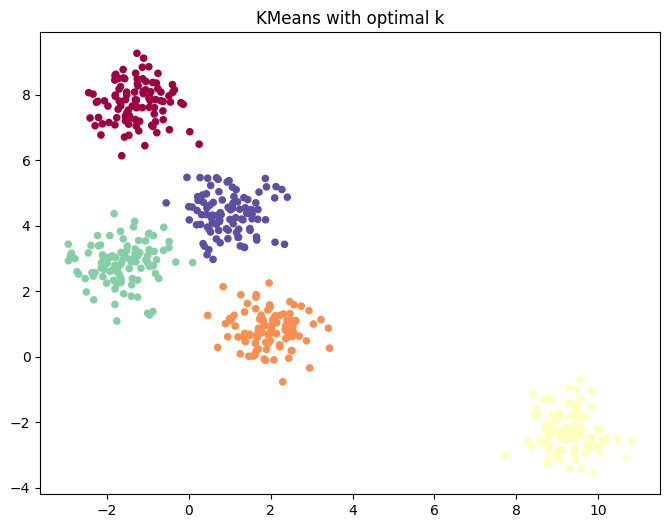

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=predicted_4, cmap='Spectral', s=20)
plt.title("KMeans with optimal k")
plt.show()

In [39]:
kmeans = KMeans(n_clusters=5, random_state=2025)
predicted_5 = kmeans.fit_predict(X)

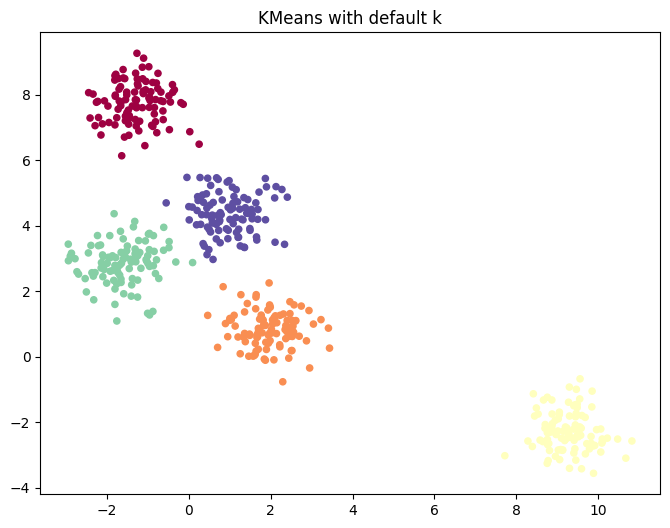

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=predicted_5, cmap='Spectral', s=20)
plt.title("KMeans with default k")
plt.show()